In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context('talk')

In [10]:
np.random.seed(2222)
T, _ = np.linalg.qr(np.random.rand(5,5))
A = T.T @ np.diag([5,4,3,2,1]) @ T

w, v = np.linalg.eig(A)
np.set_printoptions(precision=2)
print(w)
for ww in w:
    print(ww, np.abs(ww))
print(v)

[5. 1. 2. 4. 3.]
5.000000000000001 5.000000000000001
0.9999999999999983 0.9999999999999983
1.999999999999996 1.999999999999996
3.9999999999999947 3.9999999999999947
2.999999999999998 2.999999999999998
[[ 0.58 -0.29 -0.57  0.5  -0.03]
 [-0.23 -0.6   0.49  0.45 -0.37]
 [ 0.31  0.52  0.14  0.06 -0.78]
 [-0.6  -0.11 -0.64 -0.13 -0.44]
 [-0.39  0.52 -0.04  0.72  0.24]]


In [11]:
X = np.random.rand(5,3)
for i in range(50):
    Q, R = np.linalg.qr(X, mode='reduced')
    X = A @ Q
    
    print(np.diag(X.conj().T @ (A @ X)) / np.diag(X.conj().T @ X))

[3.6  4.02 4.14]
[4.   4.74 3.71]
[4.3  4.75 3.5 ]
[4.52 4.63 3.37]
[4.67 4.5  3.25]
[4.78 4.38 3.16]
[4.85 4.27 3.1 ]
[4.9  4.19 3.06]
[4.94 4.13 3.03]
[4.96 4.09 3.02]
[4.97 4.06 3.01]
[4.98 4.04 3.01]
[4.99 4.03 3.  ]
[4.99 4.02 3.  ]
[5.   4.01 3.  ]
[5.   4.01 3.  ]
[5. 4. 3.]
[5. 4. 3.]
[5. 4. 3.]
[5. 4. 3.]
[5. 4. 3.]
[5. 4. 3.]
[5. 4. 3.]
[5. 4. 3.]
[5. 4. 3.]
[5. 4. 3.]
[5. 4. 3.]
[5. 4. 3.]
[5. 4. 3.]
[5. 4. 3.]
[5. 4. 3.]
[5. 4. 3.]
[5. 4. 3.]
[5. 4. 3.]
[5. 4. 3.]
[5. 4. 3.]
[5. 4. 3.]
[5. 4. 3.]
[5. 4. 3.]
[5. 4. 3.]
[5. 4. 3.]
[5. 4. 3.]
[5. 4. 3.]
[5. 4. 3.]
[5. 4. 3.]
[5. 4. 3.]
[5. 4. 3.]
[5. 4. 3.]
[5. 4. 3.]
[5. 4. 3.]


# QR

In [12]:
X = A.copy()
Qall = np.eye(5)
for i in range(10):
    Q, R = np.linalg.qr(X)
    X = R @ Q
    
    np.set_printoptions(precision=2)
    print(np.diag(X))
    
    #Qall = Qall @ Q
    #print(Qall)

[4.4  3.58 3.08 2.52 1.43]
[4.71 4.   3.12 2.14 1.03]
[4.83 4.07 3.06 2.04 1.  ]
[4.89 4.07 3.03 2.02 1.  ]
[4.93 4.05 3.02 2.01 1.  ]
[4.95 4.04 3.01 2.   1.  ]
[4.97 4.03 3.01 2.   1.  ]
[4.98 4.02 3.   2.   1.  ]
[4.99 4.01 3.   2.   1.  ]
[4.99 4.01 3.   2.   1.  ]


In [13]:
from matplotlib.colors import LogNorm

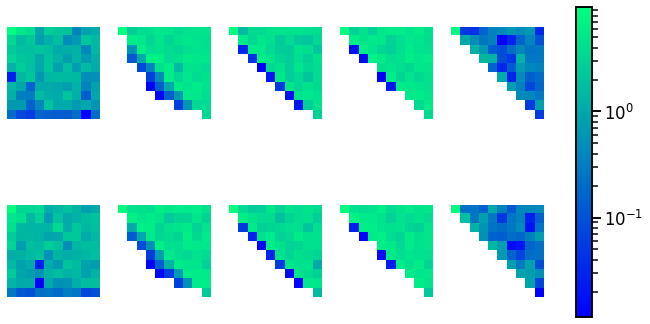

In [78]:
np.random.seed(12112019)
niter = 400
nprint = 5
niterprint = np.floor(niter / nprint)

A = np.random.rand(10,10)
A = A + 1j * np.random.rand(10,10)
A = A + A.T
X = A.copy()

ct = 0
f, ax = plt.subplots(2,nprint,sharey=True,figsize=(12,6))
for i in range(niter):
    Q, R = np.linalg.qr(X)
    X = R @ Q
    
    if i % niterprint == 0:
        
        I, J = np.where(np.abs(X) < 1e-13)
        Xtmp = X.copy()
        Xtmp[I,J] = 0.0
        
        im = ax[0,ct].imshow(np.abs(Xtmp.real), cmap=plt.cm.winter, norm=LogNorm())
        ax[0,ct].axis('off')
        
        if np.abs(Xtmp.imag).max() > 1e-13:
            im = ax[1,ct].imshow(np.abs(Xtmp.imag), cmap=plt.cm.winter, norm=LogNorm())
        ax[1,ct].axis('off')
        ct += 1
        
f.colorbar(im, ax=ax.ravel().tolist(), shrink=0.95)

In [79]:
Xtmp

array([[10.19+9.68j, -0.06-0.23j,  0.05-0.25j, -0.19+0.15j,  0.42-0.95j,
         0.49-0.38j,  0.73-0.12j,  0.55+0.39j, -0.72+0.41j, -0.04+0.46j],
       [ 0.  +0.j  , -1.05+1.83j,  0.56+0.27j, -0.3 +0.78j,  0.43-0.27j,
         0.01-0.05j, -0.04+0.27j, -0.19+0.36j,  0.46+0.03j,  0.12-0.15j],
       [ 0.  +0.j  ,  0.  +0.j  ,  1.39+1.29j,  0.77+0.59j, -0.16+0.24j,
         0.1 -0.2j , -0.24+0.28j,  0.48-0.45j, -0.28-0.02j, -0.31+0.25j],
       [ 0.  +0.j  ,  0.  +0.j  ,  0.  +0.j  , -1.57-0.56j,  1.43-0.16j,
         0.1 +0.14j,  0.06-0.21j,  1.44-0.17j,  0.32+0.35j,  0.32+0.75j],
       [ 0.  +0.j  ,  0.  +0.j  ,  0.  +0.j  ,  0.  +0.j  ,  0.19-1.43j,
        -0.04+0.78j, -0.16-0.02j, -0.8 -0.02j, -0.47+0.16j, -0.44-0.22j],
       [ 0.  +0.j  ,  0.  +0.j  ,  0.  +0.j  ,  0.  +0.j  ,  0.  +0.j  ,
        -1.1 +0.66j, -0.04+0.16j,  0.52-0.07j, -0.16-0.21j,  0.24+0.23j],
       [ 0.  +0.j  ,  0.  +0.j  ,  0.  +0.j  ,  0.  +0.j  ,  0.  +0.j  ,
         0.  +0.j  ,  0.85-0.77j,  0.4 -0.29j